# Alaska Oil & Gas Lease Analysis - Data Exploration

## Overview
This notebook explores the Alaska Outer Continental Shelf (OCS) oil and gas lease dataset from BOEM (Bureau of Ocean Energy Management).

## Dataset Information
- **Source**: Bureau of Ocean Energy Management (BOEM)
- **Region**: Alaska OCS
- **Content**: Active and inactive federal oil and gas leases
- **Last Updated**: September 17, 2024


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully")

Libraries imported successfully


## 1. Data Loading and Initial Inspection

In [2]:
# Load the dataset
df = pd.read_csv('../data/AK_Leases.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"Rows: {len(df)}")

# Display first few rows
df.head()

Dataset shape: (2446, 39)
Columns: 39
Rows: 2446


,OBJECTID,LEASE_NUMBER,BUS_ASC_NAME,IBLA_APPEAL_FLAG,LEASE_EXPIR_DATE,LEASE_STATUS_CD,LEASE_EFF_DATE,LEASE_EXPT_EXPIR,LEASE_STATUS_CHANGE_DT,LEASE_SECT_AREA,...,BLOCK_NUMBER,AREA_CODE,AC_LAB,DATUM_CODE,TRACT_NUMBER,MMS_PLAN_AREA_CD,LEASE_IS_ACTIVE,NOTES,Shape__Area,Shape__Length
0,1,Y01129,TEXACO,NaN,1994/04/25 00:00:00+00,RELINQ,1988/05/01 00:00:00+00,1998/04/30 00:00:00+00,1994/04/25 00:00:00+00,0.00,...,985,BI,BI985,0,1129,BFT,N,NaN,0.005419,0.337942
1,2,Y01151,TEXACO,NaN,1994/04/25 00:00:00+00,RELINQ,1988/05/01 00:00:00+00,1998/04/30 00:00:00+00,1994/04/25 00:00:00+00,0.00,...,19,DP,DP19,0,1151,BFT,N,NaN,0.005408,0.337409
2,3,Y01150,SHELL,NaN,1992/04/28 00:00:00+00,RELINQ,1988/05/01 00:00:00+00,1998/04/30 00:00:00+00,1992/04/28 00:00:00+00,0.00,...,18,DP,DP18,0,1150,BFT,N,NaN,0.005408,0.337421
3,4,Y01103,PHILLIPS,NaN,1998/04/30 00:00:00+00,RELINQ,1988/05/01 00:00:00+00,1998/04/30 00:00:00+00,1998/04/30 00:00:00+00,2259.14,...,7580,FI,FI7580,0,1103,BFT,N,NaN,0.005369,0.334745
4,5,Y01104,PHILLIPS,NaN,1998/04/30 00:00:00+00,RELINQ,1988/05/01 00:00:00+00,1998/04/30 00:00:00+00,1998/04/30 00:00:00+00,1846.35,...,7600,FI,FI7600,0,1104,BFT,N,NaN,0.004378,0.324900


In [3]:
# Check data types and missing values
print("Data Types and Missing Values:")
print("=" * 50)
info_df = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Non_Null_Count': df.count(),
    'Null_Count': df.isnull().sum(),
    'Null_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

info_df

Data Types and Missing Values:


,Column,Data_Type,Non_Null_Count,Null_Count,Null_Percentage
OBJECTID,OBJECTID,int64,2446,0,0.00
LEASE_NUMBER,LEASE_NUMBER,object,2446,0,0.00
BUS_ASC_NAME,BUS_ASC_NAME,object,2446,0,0.00
IBLA_APPEAL_FLAG,IBLA_APPEAL_FLAG,object,1,2445,99.96
LEASE_EXPIR_DATE,LEASE_EXPIR_DATE,object,2355,91,3.72
LEASE_STATUS_CD,LEASE_STATUS_CD,object,2446,0,0.00
LEASE_EFF_DATE,LEASE_EFF_DATE,object,2366,80,3.27
LEASE_EXPT_EXPIR,LEASE_EXPT_EXPIR,object,1770,676,27.64
LEASE_STATUS_CHANGE_DT,LEASE_STATUS_CHANGE_DT,object,2367,79,3.23
LEASE_SECT_AREA,LEASE_SECT_AREA,float64,2437,9,0.37


## 2. Key Column Analysis

Lease Status Distribution:
LEASE_STATUS_CD
RELINQ    2167
EXPIR      186
REJECT      53
NO-ISS      27
PRIMRY       8
PROD         3
TERMIN       2
Name: count, dtype: int64


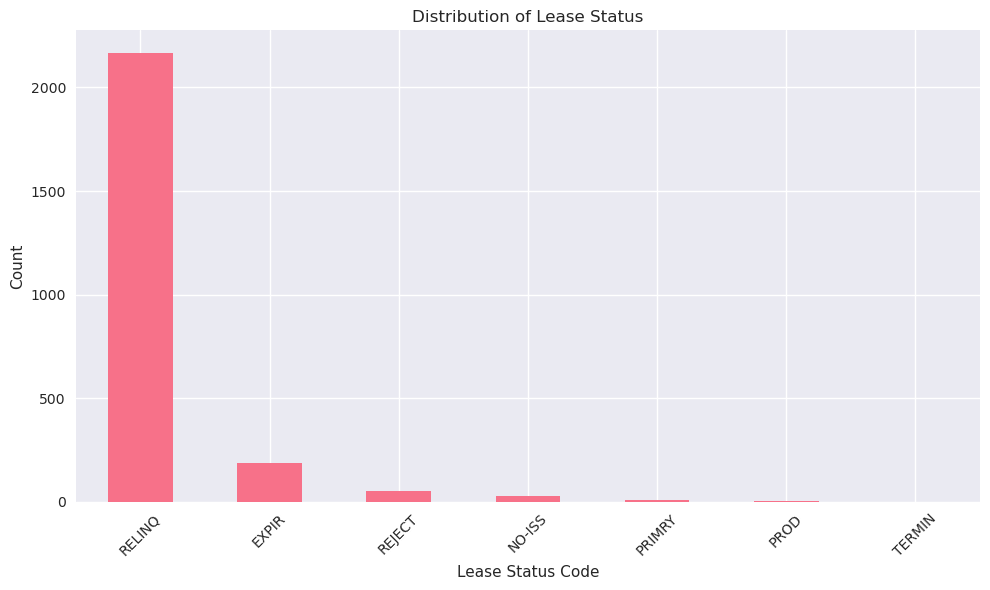

In [4]:
# Lease status analysis
print("Lease Status Distribution:")
status_counts = df['LEASE_STATUS_CD'].value_counts()
print(status_counts)

# Visualize lease status
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar')
plt.title('Distribution of Lease Status')
plt.xlabel('Lease Status Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Active vs Inactive Leases:
LEASE_IS_ACTIVE
N    2435
Y      11
Name: count, dtype: int64


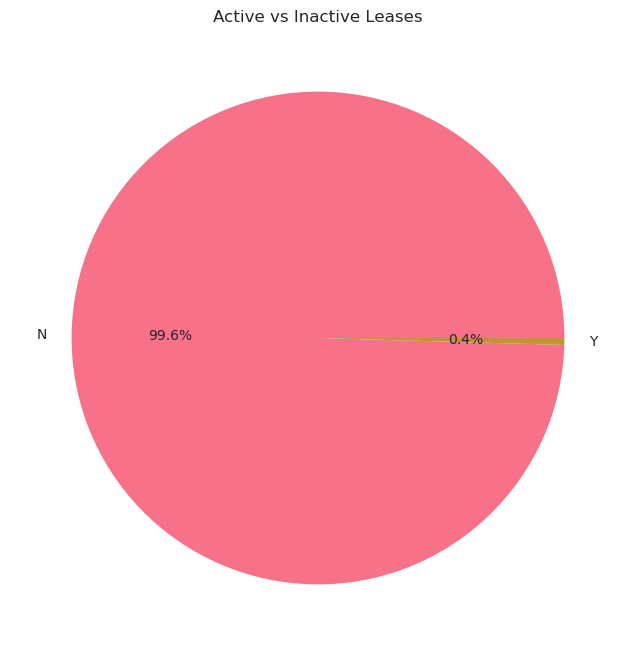

In [5]:
# Active vs Inactive leases
print("Active vs Inactive Leases:")
active_counts = df['LEASE_IS_ACTIVE'].value_counts()
print(active_counts)

# Pie chart for active status
plt.figure(figsize=(8, 8))
active_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Active vs Inactive Leases')
plt.ylabel('')
plt.show()

Top 10 Companies by Number of Leases:
BUS_ASC_NAME
SHELL      656
ARCO       303
AMOCO      199
EXXON      178
TEXACO     114
CPAI        98
REPSOL      93
CHEVRON     87
MOBIL       74
SOHIO       48
Name: count, dtype: int64


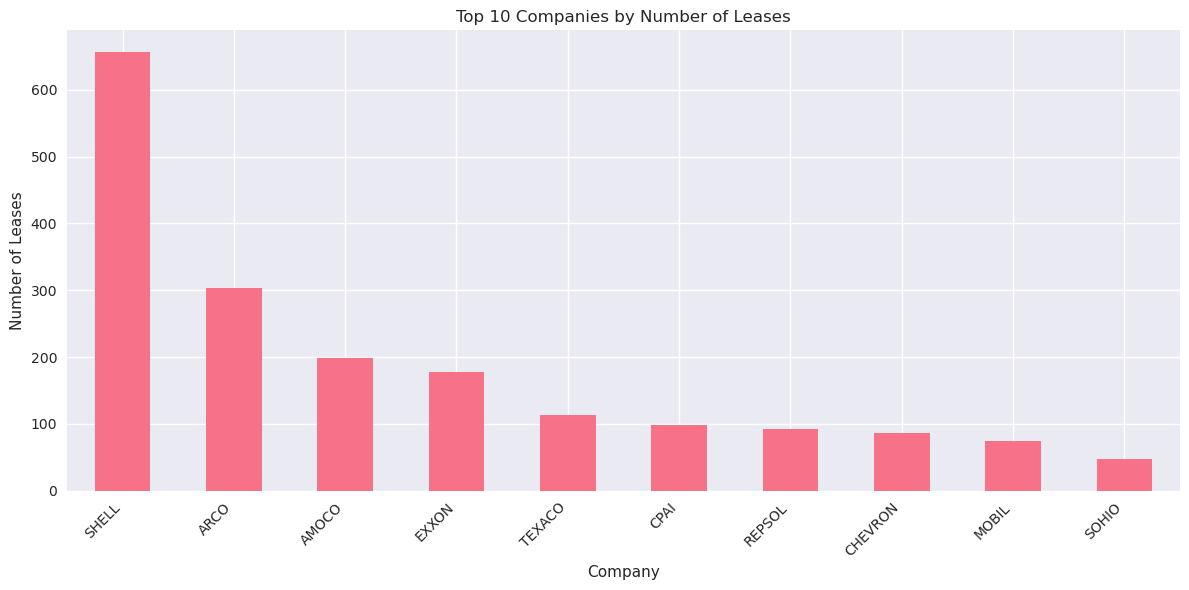

In [6]:
# Business associate (company) analysis
print("Top 10 Companies by Number of Leases:")
company_counts = df['BUS_ASC_NAME'].value_counts().head(10)
print(company_counts)

# Visualize top companies
plt.figure(figsize=(12, 6))
company_counts.plot(kind='bar')
plt.title('Top 10 Companies by Number of Leases')
plt.xlabel('Company')
plt.ylabel('Number of Leases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Temporal Analysis

In [7]:
# Convert date columns to datetime
date_columns = ['LEASE_EXPIR_DATE', 'LEASE_EFF_DATE', 'LEASE_EXPT_EXPIR', 
               'LEASE_STATUS_CHANGE_DT', 'LSE_STAT_EFF_DT', 'SALE_DATE']

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

print("Date columns converted to datetime format")

Date columns converted to datetime format


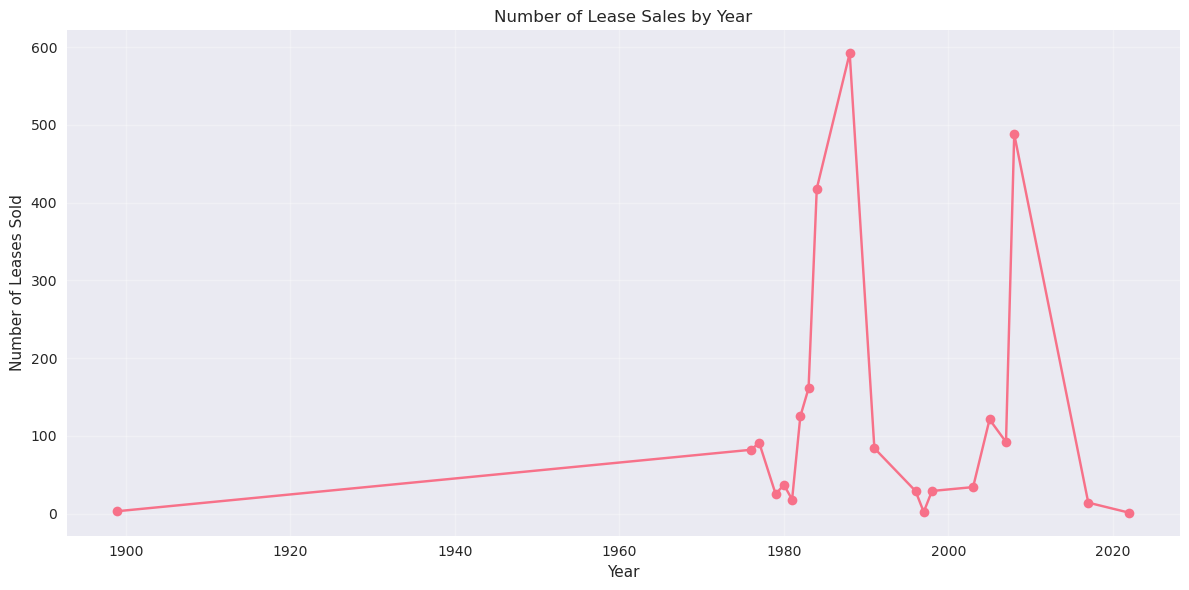

In [8]:
# Analyze lease sales over time
df['SALE_YEAR'] = df['SALE_DATE'].dt.year

# Sales by year
sales_by_year = df['SALE_YEAR'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='line', marker='o')
plt.title('Number of Lease Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Leases Sold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Geographic Analysis

In [9]:
# Regional analysis
print("Leases by Region:")
region_counts = df['MMS_REGION_CODE'].value_counts()
print(region_counts)

# Planning area analysis
print("\nLeases by Planning Area:")
planning_area_counts = df['MMS_PLAN_AREA_CD'].value_counts()
print(planning_area_counts)

Leases by Region:
MMS_REGION_CODE
Y    2446
Name: count, dtype: int64

Leases by Planning Area:
MMS_PLAN_AREA_CD
BFT    963
CHU    866
NAV    186
GOA    124
COK    121
GEO     97
NOR     64
NAL     23
Name: count, dtype: int64


Top 10 Protraction Areas by Number of Leases:
PROT_NAME
Karo                                                            313
Posey                                                           252
Flaxman Island                                                  234
Beechey Point                                                   184
Dease Inlet                                                     146
Colbert                                                         144
Harrison Bay                                                    134
(Unnamed)                                                        99
Seldovia                                                         94
Hanna Shoal                                                      86
Name: count, dtype: int64


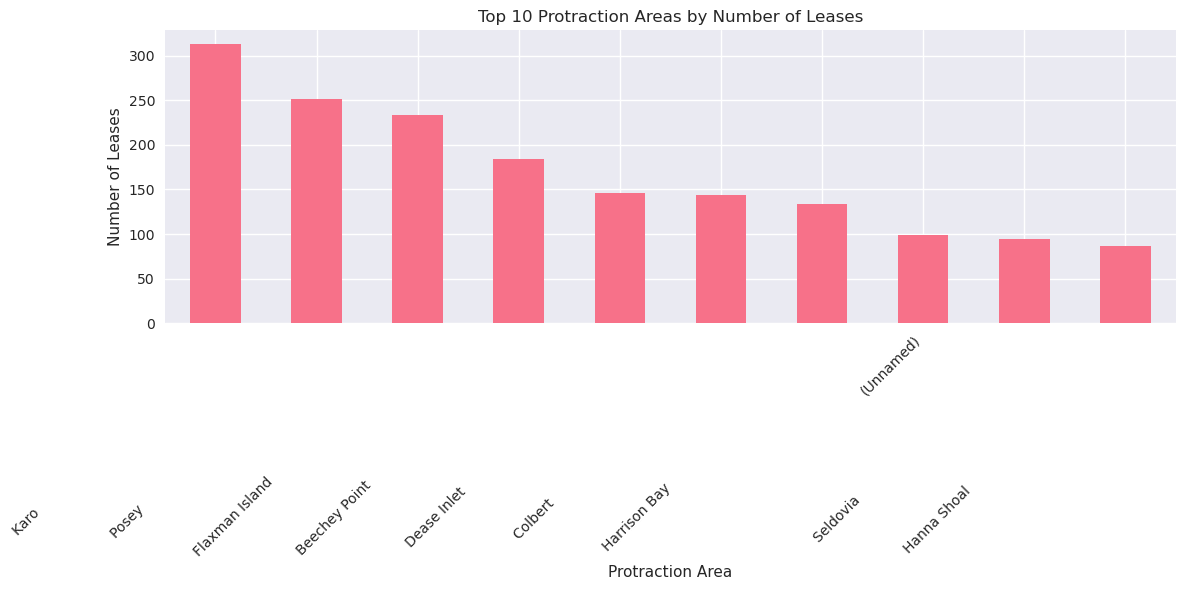

In [10]:
# Protraction areas
print("Top 10 Protraction Areas by Number of Leases:")
prot_counts = df['PROT_NAME'].value_counts().head(10)
print(prot_counts)

# Visualize top protraction areas
plt.figure(figsize=(12, 6))
prot_counts.plot(kind='bar')
plt.title('Top 10 Protraction Areas by Number of Leases')
plt.xlabel('Protraction Area')
plt.ylabel('Number of Leases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Financial Analysis

Bid Amount Statistics:
Total bid amount: $8,132,207,071.74
Average bid: $3,330,142.13
Median bid: $501,317.50
Max bid: $227,173,250.00
Min bid: $100.00


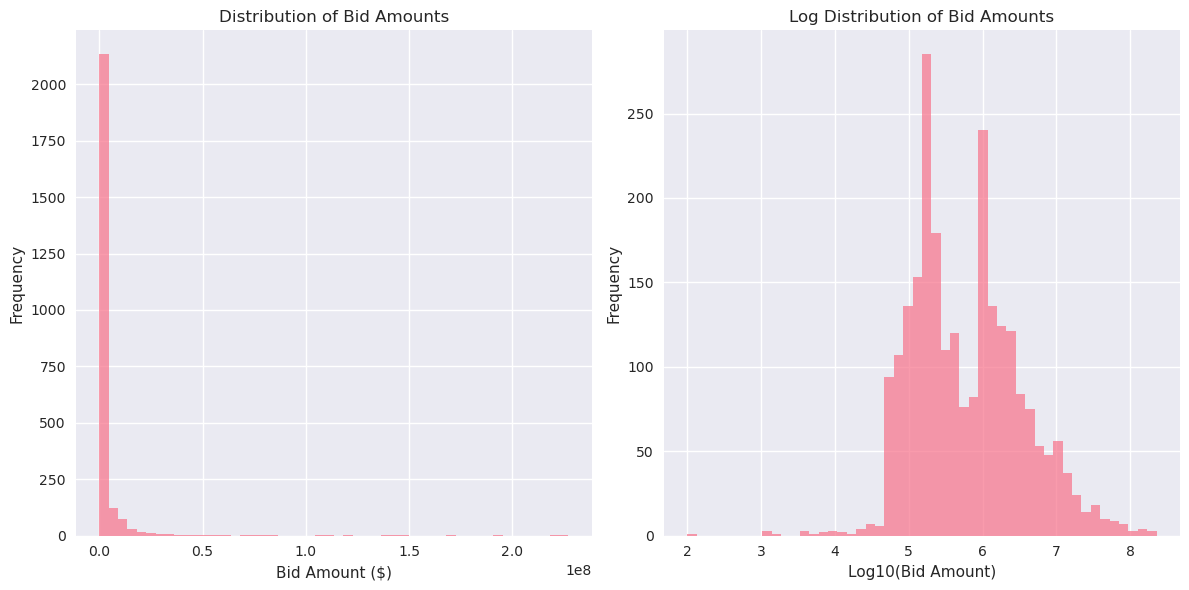

In [11]:
# Bid amount analysis
print("Bid Amount Statistics:")
print(f"Total bid amount: ${df['BID_AMOUNT'].sum():,.2f}")
print(f"Average bid: ${df['BID_AMOUNT'].mean():,.2f}")
print(f"Median bid: ${df['BID_AMOUNT'].median():,.2f}")
print(f"Max bid: ${df['BID_AMOUNT'].max():,.2f}")
print(f"Min bid: ${df['BID_AMOUNT'].min():,.2f}")

# Distribution of bid amounts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['BID_AMOUNT'].hist(bins=50, alpha=0.7)
plt.title('Distribution of Bid Amounts')
plt.xlabel('Bid Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
np.log10(df['BID_AMOUNT'].replace(0, np.nan)).hist(bins=50, alpha=0.7)
plt.title('Log Distribution of Bid Amounts')
plt.xlabel('Log10(Bid Amount)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
# Royalty rate analysis
print("Royalty Rate Distribution:")
royalty_counts = df['ROYALTY_RATE'].value_counts().sort_index()
print(royalty_counts)

# Area analysis
print("\nLease Area Statistics:")
print(f"Total current area: {df['CURRENT_AREA'].sum():,.2f} hectares")
print(f"Average lease size: {df['CURRENT_AREA'].mean():,.2f} hectares")
print(f"Median lease size: {df['CURRENT_AREA'].median():,.2f} hectares")

Royalty Rate Distribution:
ROYALTY_RATE
0.000000       87
12.500000    2021
16.666667     291
16.666667       1
16.666670       7
16.666700       6
18.750000       1
20.111210       1
21.780000       1
21.978000       1
25.500000       1
26.413930       1
27.626560       1
30.300000       1
31.862000       1
31.884000       1
31.963000       1
32.771000       1
34.511110       1
35.521250       1
41.127000       1
41.700000       6
48.157000       1
49.451250       1
50.251250       1
52.150000       1
53.150000       1
55.150000       1
56.567890       1
57.251250       1
57.515750       1
63.444440       1
Name: count, dtype: int64

Lease Area Statistics:
Total current area: 5,393,306.99 hectares
Average lease size: 2,204.95 hectares
Median lease size: 2,304.00 hectares


## 6. Summary Statistics

In [13]:
# Generate comprehensive summary
print("ALASKA OCS LEASE DATASET SUMMARY")
print("=" * 50)
print(f"Total number of leases: {len(df):,}")
print(f"Date range: {df['SALE_DATE'].min().strftime('%Y-%m-%d')} to {df['SALE_DATE'].max().strftime('%Y-%m-%d')}")
print(f"Number of unique companies: {df['BUS_ASC_NAME'].nunique()}")
print(f"Number of planning areas: {df['MMS_PLAN_AREA_CD'].nunique()}")
print(f"Active leases: {(df['LEASE_IS_ACTIVE'] == 'Y').sum():,}")
print(f"Inactive leases: {(df['LEASE_IS_ACTIVE'] == 'N').sum():,}")
print(f"Total bid value: ${df['BID_AMOUNT'].sum():,.2f}")
print(f"Total lease area: {df['CURRENT_AREA'].sum():,.2f} hectares")

ALASKA OCS LEASE DATASET SUMMARY
Total number of leases: 2,446
Date range: 1899-12-30 to 2022-12-30
Number of unique companies: 75
Number of planning areas: 8
Active leases: 11
Inactive leases: 2,435
Total bid value: $8,132,207,071.74


Total lease area: 5,393,306.99 hectares
